In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv"
df = pd.read_csv(url)
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [2]:
df.shape

(5000, 15)

In [3]:
numerical_cols = ['Transaction_Amount', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']

print("Descriptive Statistics:")
print(df[numerical_cols].describe())

Descriptive Statistics:
       Transaction_Amount  Cardholder_Monthly_Income  Cardholder_Average_Spend
count         4994.000000                4686.000000               4792.000000
mean         74667.995995              137353.817542              63058.343566
std          43089.045623               69471.623020              40056.989704
min          25008.000000               35005.000000              10282.410000
25%          39742.500000               73485.000000              33336.742500
50%          60922.000000              131833.000000              49547.945000
75%          98373.500000              189054.250000              83732.352500
max         199923.000000              299907.000000             199898.290000


In [4]:
categorical_cols = ['Card_Type', 'Merchant_Category', 'Location']

for col in categorical_cols:
    if col in df.columns:
        print(f"\nValue counts for {col}:\n{df[col].value_counts()}")



Value counts for Card_Type:
Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64

Value counts for Merchant_Category:
Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64

Value counts for Location:
Location
Surat        431
Kochi        415
Bengaluru    410
Hyderabad    395
Mumbai       387
Chennai      387
Lucknow      379
Pune         376
Kolkata      373
Jaipur       373
Patna        371
Delhi        357
Ahmedabad    346
Name: count, dtype: int64


<ipython-input-5-20787447d971>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


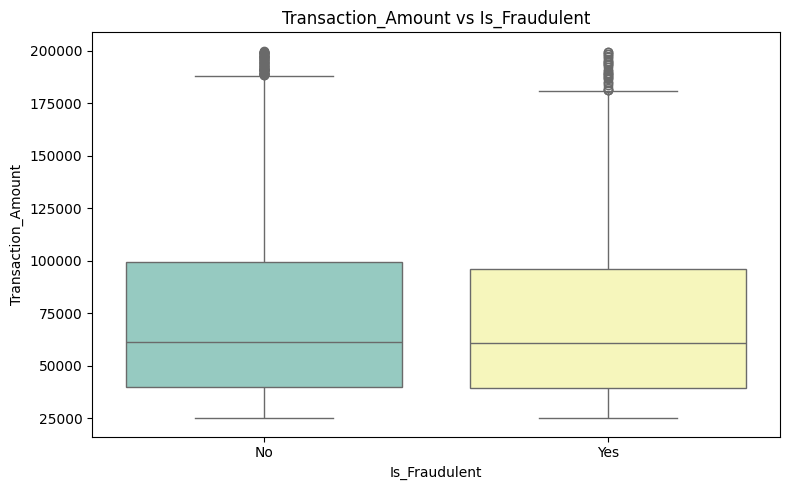

<ipython-input-5-20787447d971>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


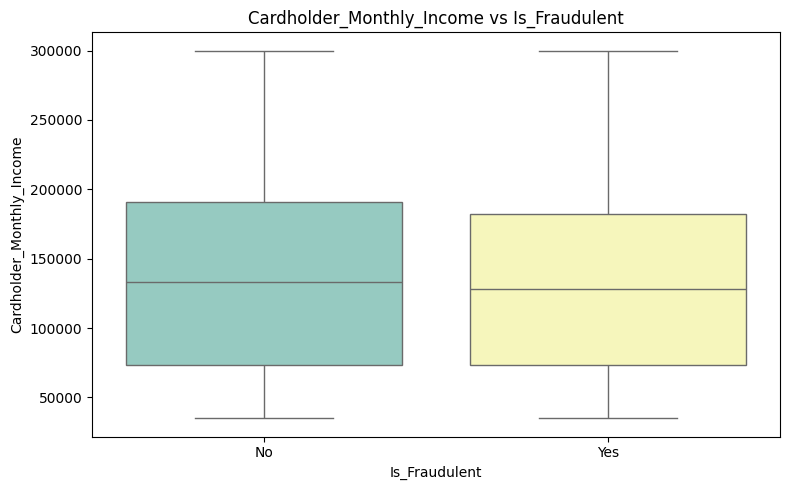

<ipython-input-5-20787447d971>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


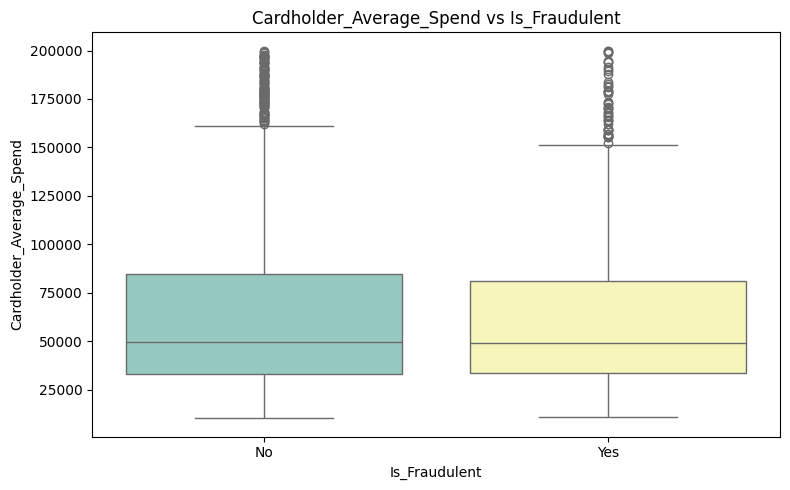

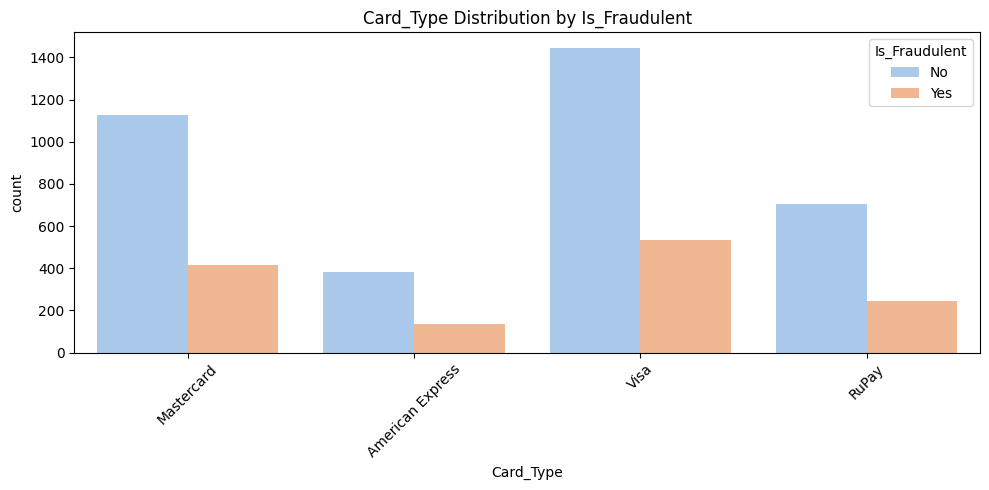

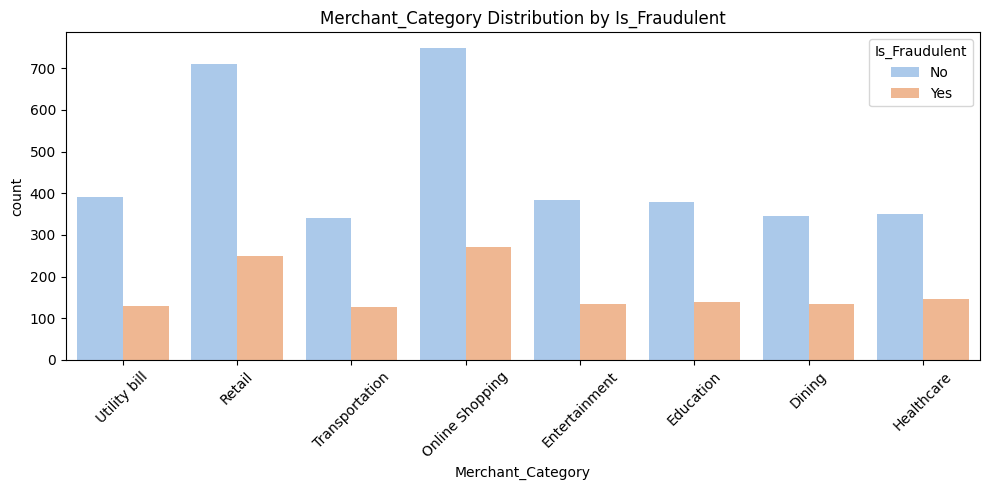

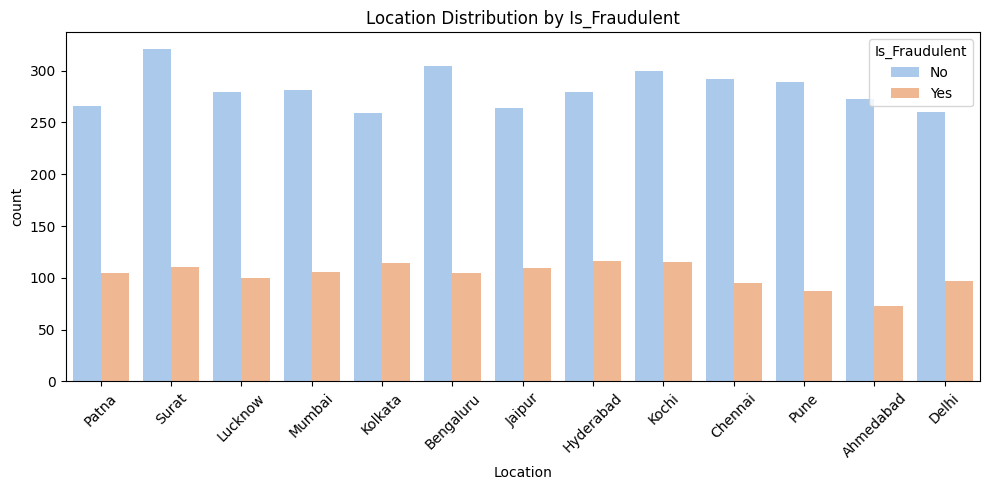

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Is_Fraudulent'
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target, y=col, palette="Set3")
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, hue=target, palette='pastel')
        plt.title(f'{col} Distribution by {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


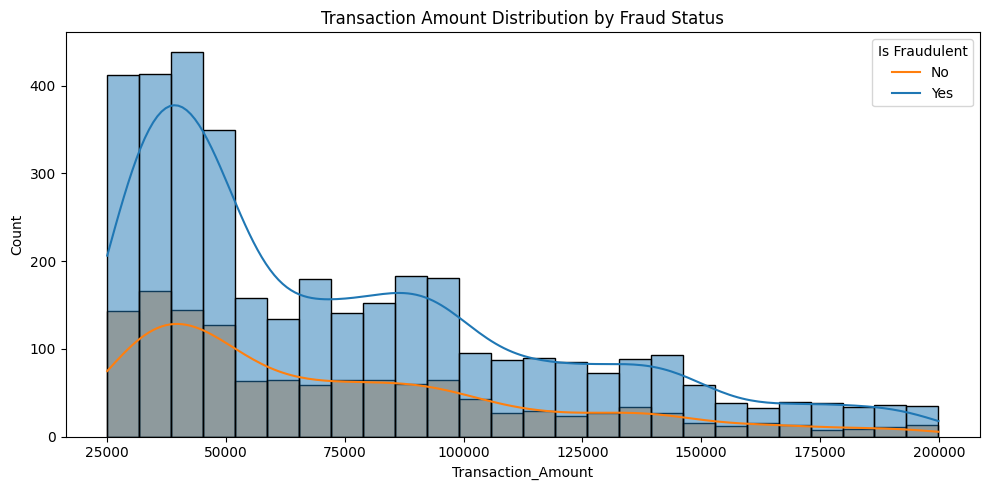

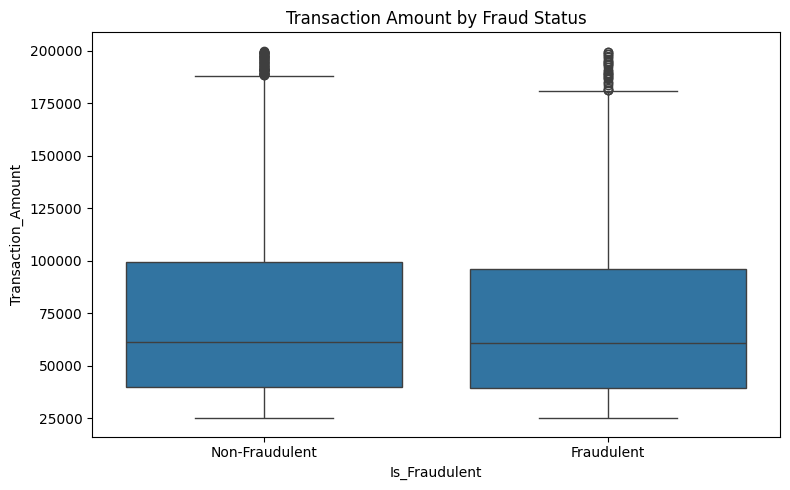

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent',kde=True)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.legend(title="Is Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Is_Fraudulent', y='Transaction_Amount')
plt.title("Transaction Amount by Fraud Status")
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.tight_layout()
plt.show()

In [7]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [8]:
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

<ipython-input-8-3552b8fbbbcf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-8-3552b8fbbbcf>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [9]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,0


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for col in columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        initial_shape = cleaned_data.shape[0]
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        print(f"Removed {initial_shape - cleaned_data.shape[0]} outliers from '{col}'")
    return cleaned_data

df_cleaned = remove_outliers_iqr(df, numerical_cols)

Removed 97 outliers from 'Transaction_Amount'
Removed 131 outliers from 'Cardholder_Age'
Removed 0 outliers from 'Cardholder_Monthly_Income'
Removed 147 outliers from 'Cardholder_Average_Spend'
Removed 8 outliers from 'Credit_Limit'


In [11]:
df_cleaned.shape

(4617, 15)

<ipython-input-12-9b3b55d8b202>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


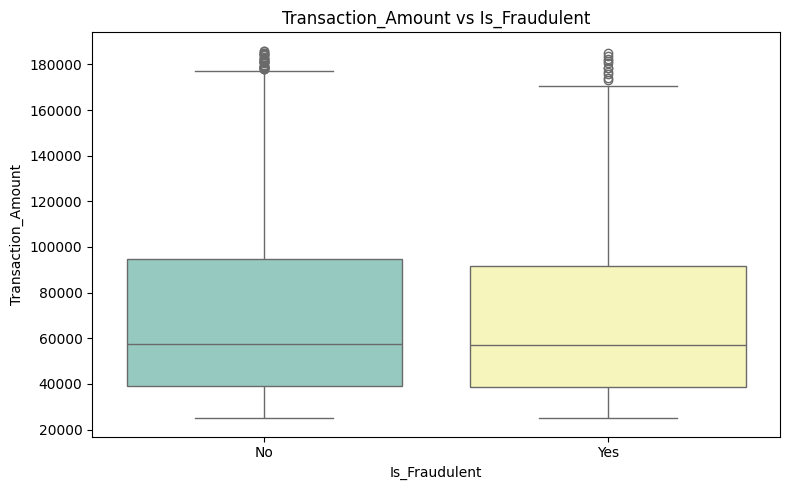

<ipython-input-12-9b3b55d8b202>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


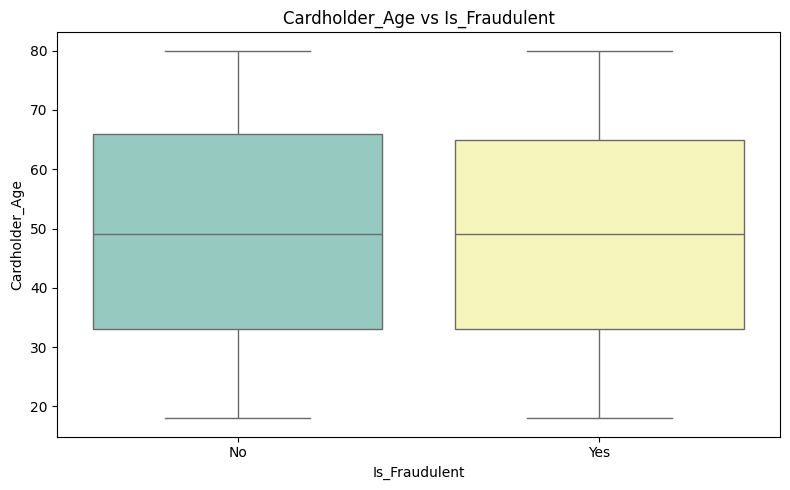

<ipython-input-12-9b3b55d8b202>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


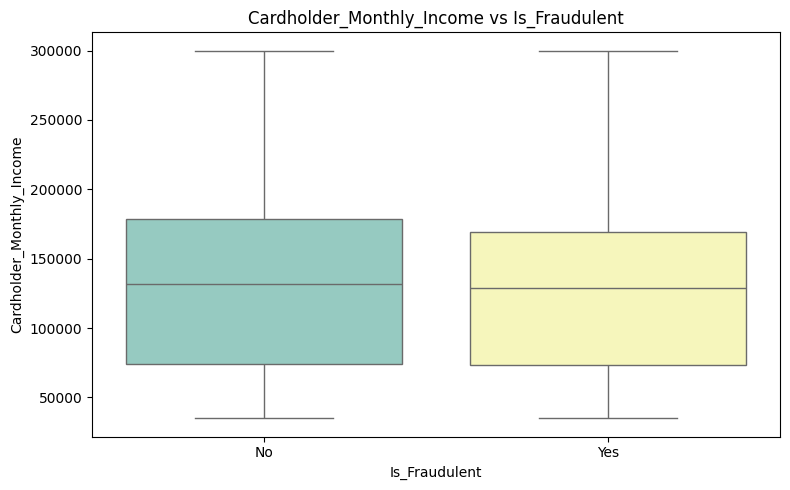

<ipython-input-12-9b3b55d8b202>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


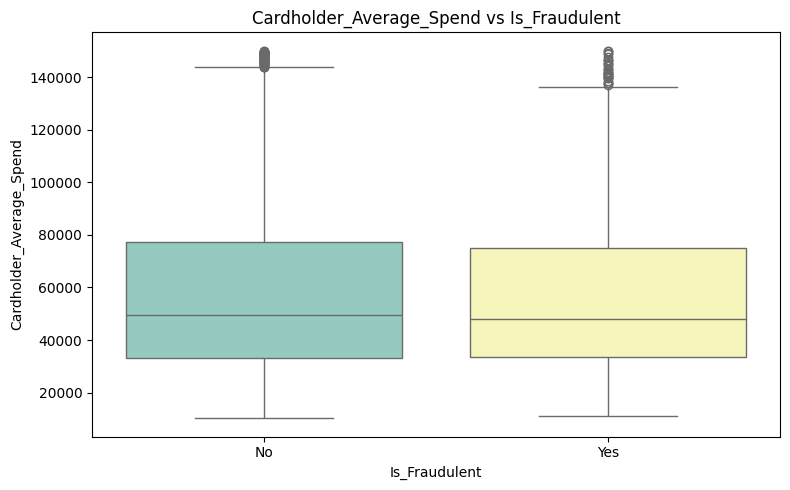

<ipython-input-12-9b3b55d8b202>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


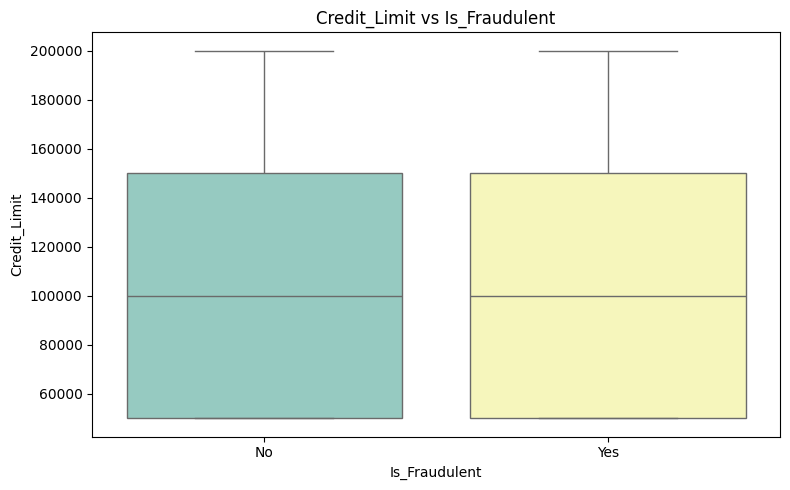

In [12]:
target = 'Is_Fraudulent'
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

In [36]:
print("Skewness Scores:")
skew_scores = df_cleaned[numerical_cols].skew().sort_values(ascending=False)
print(skew_scores)

highly_skewed = skew_scores[abs(skew_scores) > 1].index.tolist()

Skewness Scores:
Cardholder_Average_Spend     0.203512
Transaction_Amount           0.199367
Credit_Limit                 0.089569
Cardholder_Monthly_Income    0.060459
Cardholder_Age              -0.009141
dtype: float64


In [37]:
import numpy as np

df_cleaned['Transaction_Amount'] = np.log1p(df_cleaned['Transaction_Amount'])

print("Skewness after log1p transformation:")
print(df_cleaned[['Transaction_Amount']].skew())


Skewness after log1p transformation:
Transaction_Amount    0.142313
dtype: float64


In [39]:
print("Skewness Scores:")
skew_scores = df_cleaned[numerical_cols].skew().sort_values(ascending=False)
print(skew_scores)

highly_skewed = skew_scores[abs(skew_scores) > 1].index.tolist()

Skewness Scores:
Cardholder_Average_Spend     0.203512
Transaction_Amount           0.142313
Credit_Limit                 0.089569
Cardholder_Monthly_Income    0.060459
Cardholder_Age              -0.009141
dtype: float64


In [40]:
df_cleaned['Cardholder_Average_Spend'] = np.sqrt(df_cleaned['Cardholder_Average_Spend'])

print("Skewness after log1p transformation:")
print(df_cleaned[['Cardholder_Average_Spend']].skew())

Skewness after log1p transformation:
Cardholder_Average_Spend    0.063184
dtype: float64


In [17]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']


In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

df_cleaned.head()


,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4083,1,7,2.416942,0,10,0,23.0,0,307.623146,3.716143,100000.0,4,6,0
1,3830,0,5,2.512689,1,12,3,49.0,1,384.861014,4.157028,150000.0,1,0,0
4,1797,2,5,2.509950,2,8,1,37.0,0,417.696062,3.892600,200000.0,2,2,0
5,1564,2,2,2.548659,3,9,3,80.0,1,408.253598,4.103482,150000.0,3,2,0
6,4293,3,5,2.552760,4,12,3,33.0,1,414.717976,4.127377,150000.0,1,3,1


Correlation of features with Is_Fraudulent:
Is_Fraudulent                1.000000
Location                     0.016665
Cardholder_Gender            0.015324
Transaction_ID               0.015175
Day_of_Week                  0.008647
Card_Type                    0.006185
Device_Type                 -0.002220
Cardholder_Age              -0.002449
Cardholder_Average_Spend    -0.009211
Transaction_DateTime        -0.010693
Merchant_Category           -0.013753
Credit_Limit                -0.014972
Transaction_Amount          -0.017542
Cardholder_Monthly_Income   -0.021515
Region                      -0.036129
Name: Is_Fraudulent, dtype: float64


<Axes: >

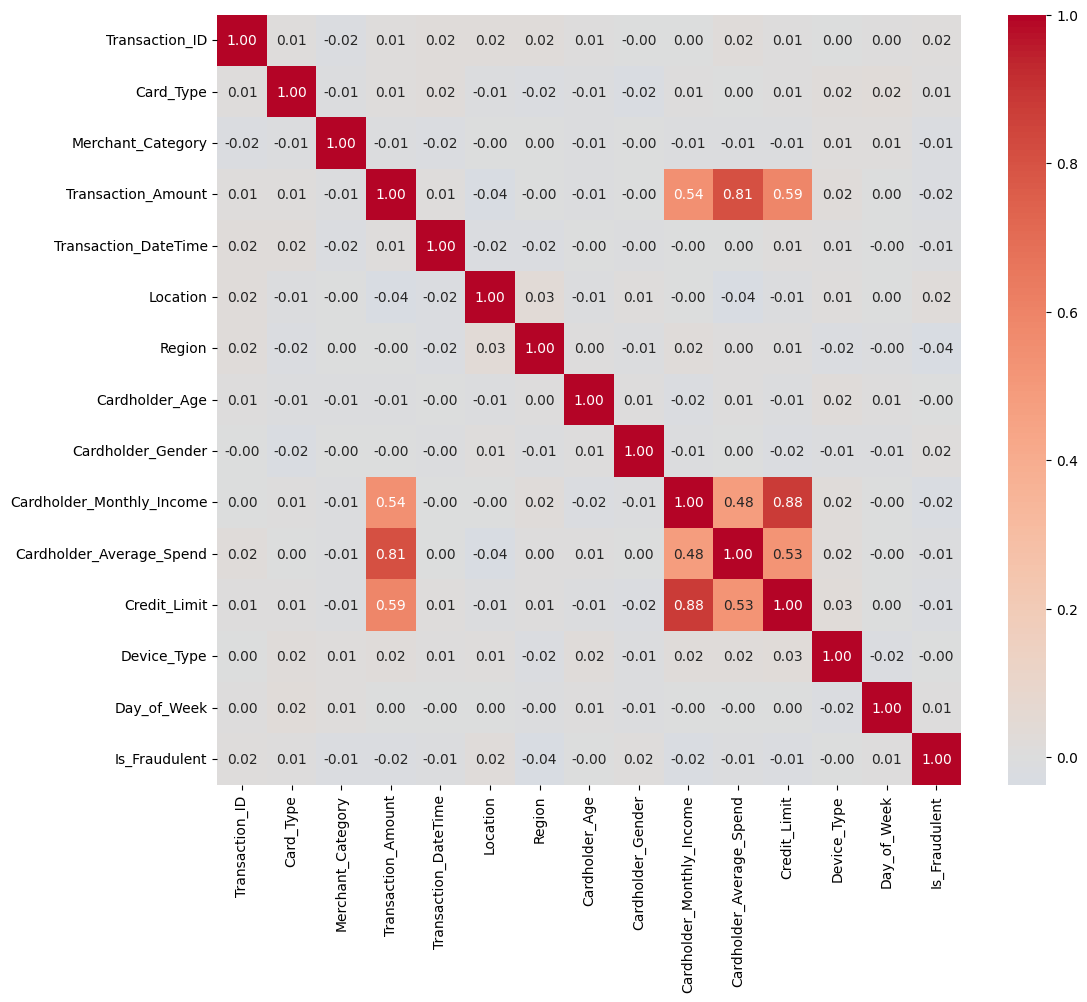

In [42]:
corr_matrix = df_cleaned.corr()

target_corr = corr_matrix['Is_Fraudulent'].sort_values(ascending=False)
print("Correlation of features with Is_Fraudulent:")
print(target_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)


In [43]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['Is_Fraudulent','Transaction_ID','Card_Type','Cardholder_Gender','Transaction_DateTime','Region','Location','Merchant_Category','Device_Type','Day_of_Week'])
y = df_cleaned['Is_Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape

(3693, 5)

In [44]:
X_test.shape

(924, 5)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [23]:
X_train.head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
3591,-0.832834,-0.003094,1.366433,-0.792364,1.444214
3282,-0.550368,1.085227,-0.597184,0.113553,-0.398094
3331,-0.785151,0.432234,1.035768,-0.318530,0.523060
3242,-0.989757,-1.037000,-0.054293,-1.236586,-0.398094
1965,0.443667,0.051322,1.100690,0.311724,1.444214


In [46]:
X_test.head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
4080,0.917645,-1.635576,-0.139436,-0.038689,-0.398094
1423,-1.438414,1.411723,1.652925,-1.440085,1.444214
2355,-0.479070,-1.091416,-1.594663,-0.663017,-1.319248
4286,-0.613913,1.629388,-0.057195,-0.362039,0.523060
4309,-0.519984,-1.363496,-1.153540,-0.214303,-1.319248


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'F1-Score': f1}

results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)
print(results_df)



                        Accuracy  F1-Score
Decision Tree           0.595238  0.272374
K-Nearest Neighbors     0.688312  0.132530
Random Forest           0.717532  0.050909
Logistic Regression     0.733766  0.000000
Naive Bayes             0.733766  0.000000
Support Vector Machine  0.733766  0.000000


In [48]:
results_df = pd.DataFrame(results).T

best_model_f1 = results_df.sort_values(by='F1-Score', ascending=False).iloc[0]
print(best_model_f1)

best_model_acc = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print(best_model_acc)


Accuracy    0.595238
F1-Score    0.272374
Name: Decision Tree, dtype: float64
Accuracy    0.733766
F1-Score    0.000000
Name: Logistic Regression, dtype: float64


Accuracy: 0.7175
Precision: 0.2414
Recall: 0.0285
F1-Score: 0.0509


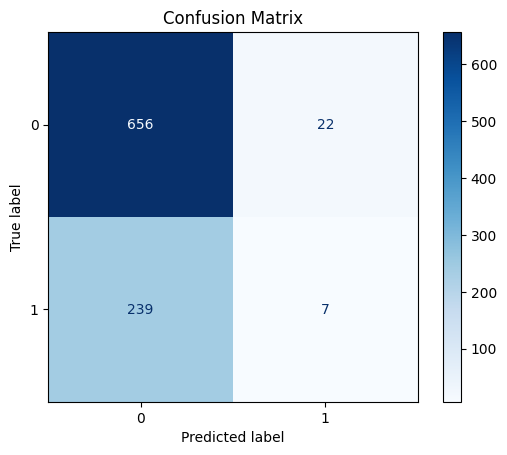

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

best_clf = RandomForestClassifier(random_state=42)

best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
